# Homework 3: Fitting and modeling

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
rng = np.random.default_rng()

# 1. Story time

*(a)* Make up a situation different from those given in class
where one might expect to obtain a Poisson distribution,
and explain why.
Make sure to specify the mean of the Poisson, and give the units.

*(b)*  Make up a situation different from those given in class
where one might expect to obtain a Normal distribution,
and explain why.
Make sure to specify the mean and standard deviation, and give the units.

**Response to Part A**
One example where I might find a Poisson Distribution is where I im tracking spam emails over a day. Poisson distributions happen when there is a small chance for an event to occur over a specific time interval. In this case, the rare event is getting a spam email, with the time unit being 1 day. In this example each "data point" or occurance would be the number of spam emails received in one day. If you recorded the amount of spam emails you recieved over the course of a year (365 being the size of your distribution), it should come out to be roughly poisson-ic given that the chance you get a spam email is reasonably small. 

**Response to Part B**
One example where I might find a normal distribution would be in the gym. This example came to me when I was in the gym working out, and I noticed the wear and tear on the weights of the machines. What I mean by this is how in the gym on the machines that adjust the weight by moving a pin, there was significant wear and tear on the middle of the weights. The interesting thing is that the wear and tear decreased from the center point, with there being visibly less wear on weights skewed out to both ends. Anyways to get to the specifics, I would expect the amount of weight people worked out with (on one machine lets say tricep pushdowns), to be normal. The mean would be the average plate pushed being 60 pounds, with a rough standard deviation of 10 pounds (being one plate away from the mean). 

# 2. Squirrels

A squirrel is dropping acorns on my picnic table
at an average rate of 1 per second.
My glass covers only a small portion of the table - about 0.3%.
The acorns fall randomly (uniformly) on the table,
so only 0.3% of the acorns fall in my glass.
(Below when I ask you to "justify",
you can refer to material from class for the justification,
I don't mean you need to provide a mathematical proof.)

*(a)* About how often does the squirrel get an acorn into my glass?
Propose, and justify a distribution for $T$,
the amount of time that passes between subsequent acorns
falling into my glass.


*(b)* If I leave for 20 minutes, how many acorns do I expect to find
in my glass when I return? Propose, and justify, a distribution for this number (let's call it $X$).

*(c)* If my glass starts empty, how long is it, more or less,
before I have 5 acorns in my glass? Using simulation,
find the mean and make a histogram describing this
distribution from simulation.
*(hint: use your answer to (a) to simulate)*

**Response to Part A**
I would expect a squirrel to get an acorn in the glass every 333 seconds. This is because a squirrel randomly dropping it on the table has a .03 percent chance of landing on the portion of the table with a glass on it. So to calculate an expected chance of 1, we would divide 1 by .3 percent which is 333 seconds. We would expect the distriubtion for T to be roughly normal, with the mean being centered around 333 seconds. We would expect this to be normal because the distribution is composed of multiple independent events, that all have the same expected mean and standard deviation. The mean would be 333 seconds, with the standard deviation being calculated as it would be on the slides. 

**Response to Part B**

If you left for 20 minutes you would expect to find .003 * (20 * 60) acorns in your glass. This is because after one second you expect to find .003 * 1 acorns, so to calculate 20 minutes we must multiply .003 by (20*60). However because you can't have a decimal number of acorns you would expect to find either 3 or 4 acorns. I would expect this distribution to also be normal for the same reason as above. Each event for 20 minutes is independent and has the same expected mean and standard deviation across events. 


**Explanation for Part C**

For this part were going to simulate how long it takes before there are 5 acorns in a glass. We should expect this mean to be 1665 because we expect 1 acorn every 333 seconds, so we will expect 5 acorns after 333* 5 seconds (1665). To do this we're going to simulate with the following code. In the code we have two counters, acorn_counter and time. Time should be incremented in each loop considering that regardless of whether or not the squirrel drops an acorn in the glass, we must increment a second. In this case to increment acorn_counter the probability of rng.random must be below .003 because that is the chance an acorn falls in the glass. 

**Code For Part C**

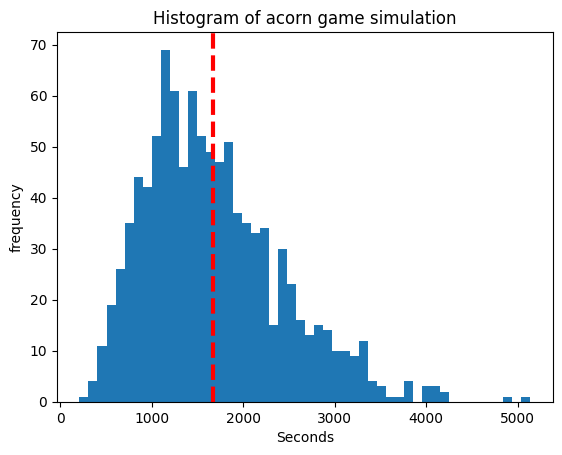

In [2]:
def acorn_simulation():
    acorn_counter = 0
    time = 0
    while acorn_counter < 5:
        if rng.uniform() <= .003:
            acorn_counter +=1
        time += 1
    return time

data = [acorn_simulation() for i in range(1,1000)] #hitting the classic list comprehension
plt.hist(data, bins = 50)
plt.xlabel("Seconds")
plt.ylabel("frequency")
plt.title("Histogram of acorn game simulation")
plt.axvline(np.mean(data),linewidth = 3, color= 'r', linestyle = '--')

        

# 3. The forest

Suppose a tree grows, each year, a random amount whose average is 49cm and whose SD is 30cm.

*(a)* If the amount grown each year is independent of every other year,
what's the distribution, approximately, of the height after 100 years (starting from height 0cm)?

*(b)* Suppose we have a forest full of 100-year-old trees that all grow like this (independently).
What proportion of them are taller than 55m?

*(c)* Healthy forests have a mixed age distribution.
Simulate and plot a histogram of tree heights, if
the distribution of tree ages in years is Geometric with mean 100 years.
Make sure to label your axes, with units.
(You can use the distribution from part (a).)

*(d)* In early life, tree growth can differ more strongly with age.
Suppose that for the first 10 years, the mean amount grown in year $y$ is $5y$cm, with a SD of $3y$cm.
What is the mean height after 10 years? Explain your answer.
Also compute the standard deviation assuming that the amount grown each year is independent,
but say why the assumption of independence is unlikely to be true.

**Response to Part A**
We would expect the height of the tree to be normally distributed because the height of the tree is composed of multiple independent events all that have the same mean and standard deviation

**Response to Part B**

Well we need to calculate the proportion of trees that are above 55m. To do this we can build our expected distribution of tree height after 100 years, and then calculate the area under that distribution that is above 55 meters. Our expected distribution of the height after 100 years is centered around 4900 cm (mean * 100) with a standard deviation of 300cm(standard deviation calculated with the variance formula on the slides being standard deviation of set multiplied by the square root of n so 30 * sqrt(100) = 300). Now knowing that our distribution is expected to have a mean of 49 meters and a standard deviation of 3 meters we can find the proportion to the right of 55 in our expected distribution to find our the expected proportion of trees taller than 55m. See Code Below For Calculations

We could also notice that 55 is exactly 2 standard deviations away from the mean on the right so using the 68-95-99.7 rule there should be roughly 2.5 percent of trees are taller than 55 meters)

**Code for Part B**



In [3]:
expected_mean = 49
expected_SD = 3
1 - norm.cdf(55, 49, 3) #Subtract from 1 because norm.cdf finds the area to the left of the given area. 

0.02275013194817921

**Explanation for Code for Part C**
First thing we need to do is have a function that will simulate a tree's height in meters given it's age. We can do this by multiplying our mean tree growth by a tree's age, and multiplying our standard deviation by the square root of age to create a sample distribution for each age. Then after we have that we just need to pull a number from that distribution to find an example tree height. Now that we have the function to simulate tree heights, we need to create a geometric array that represents the ages of trees in a forest. When we create the geometric array, we need to make sure the array has a mean of 100 and we'll make the geometric array have a size of 5000 to represent a forest with 5000 trees. When creating this array we just can call the rng module and realize that to create a distribution of a certain mean, we can set the probability of a successful event to be 1/certain mean.

**Code For Part C**

Text(0.5, 1.0, 'Histogram of Geometric Distributed Tree Height')

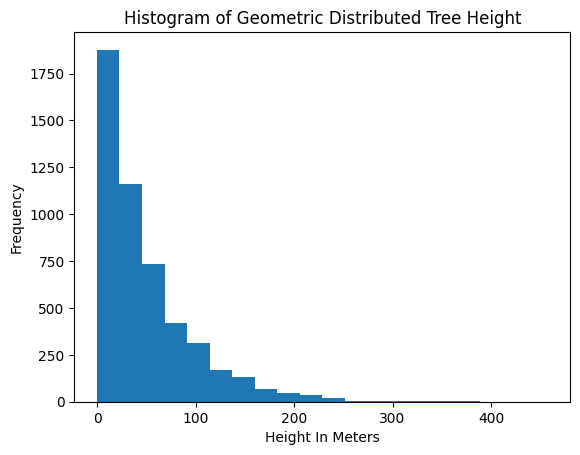

In [4]:
def sim_tree_height(age):
    mean_age = 49 * age
    std_age = 30 * age**(1/2)
    normal_pull = rng.normal(loc = mean_age, scale = std_age)
    return normal_pull/100 #divide by 100 to convert the centimeters into meters
    
geometric_tree = rng.geometric(1/100,5000)

sim_geo_height = sim_tree_height(geometric_tree)
plt.hist(sim_geo_height,bins = 20)
plt.ylabel("Frequency")
plt.xlabel("Height In Meters")
plt.title("Histogram of Geometric Distributed Tree Height")


**Response to Part D** 

We would expect the mean height after the first 10 years would be 1x5 + 2x5 ... 10x5 = 275. This is because each event is independent from eachother, and each year has a sample mean of 5 * year. As we learned in class the means are additive across two independent events, so we can just add all the sample means together. To find the standard deviation, we can use the fact that variances are addidtive and then take the square root of the final result. As variances are the square of a particualr years standard deviation we can find them by squaring each years standard deviation. So the variances are as follows: (3x1)^2 + (3x2)^2 + (3x3)^2 ... (3x10)^2 = 3465. Finally we can take the square root of that number to find the expected standard deviations which we find to be 58.86 (Code for the math is right below this cell)

The assumption of independence is unlikely to be true because there is probably a genetic component that influences the height. This genetic component removes the independence between trees, and likely influences both the standard deviation and mean tree height of tree. I.e there is a genetic component that makes certain tree's more/less prone to growing. There also is a factor of location, I'm no biologist but I would imagine that a tree that gets plenty of sunlight would grow differently then a tree that gets little to no sunlight. As there are factors and conditions that control a tree's height, we cannot just assume that all the trees would be the same/independent from eachother. 

**Code for finding standard deviation of set**

In [5]:
variances_list = [(3*i)**2 for i in range(1,11)]
variance_sum= sum(variances_list)
standard_deviation_of_set = math.sqrt(variance_sum)
standard_deviation_of_set

58.86425061104575